In [18]:
import json
import gc
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from pandas import json_normalize #package for flattening json in pandas df

%matplotlib inline

In [3]:
df_dados = pd.read_excel('./base/lista-pares.xlsx')
df_dados

,C1,C2,C1-descricao,C2-descricao,quant,tempo-min,tempo-max,mediana
0,493,132,Entrega em carga/vista,Recebimento,39920,0.0,1858.0,27.0
1,51,11010,Conclusão,Mero expediente,39897,0.0,1615.0,12.0
2,132,85,Recebimento,Petição,27539,0.0,1449.0,3.0
3,85,51,Petição,Conclusão,26424,0.0,1319.0,2.0
4,123,132,Remessa,Recebimento,12806,0.0,3312.0,22.0
...,...,...,...,...,...,...,...,...
1459,11014,132,Convenção das Partes para Cumprimento Voluntár...,Recebimento,1,NaN,NaN,NaN
1460,11025,493,Suspensão ou Sobrestamento,Entrega em carga/vista,1,NaN,NaN,NaN
1461,11382,48,Bloqueio/penhora on line,Escrivão/Diretor de Secretaria/Secretário Jurí...,1,NaN,NaN,NaN
1462,11383,25,Ato ordinatório,Suspensão ou Sobrestamento,1,NaN,NaN,NaN


In [4]:
df_dados = df_dados.dropna()

In [5]:
df_dados[df_dados['quant'] >= 10].sort_values('mediana')

,C1,C2,C1-descricao,C2-descricao,quant,tempo-min,tempo-max,mediana
452,981,36,Recebimento,Redistribuição,24,0.0,13.0,0.0
582,1051,276,Decurso de Prazo,Execução frustrada,12,0.0,553.0,0.0
365,132,893,Recebimento,Desarquivamento,42,0.0,7.0,0.0
579,581,246,Documento,Definitivo,12,0.0,118.0,0.0
577,123,311,Remessa,Leilão ou Praça,12,0.0,25.0,0.0
...,...,...,...,...,...,...,...,...
147,36,493,Redistribuição,Entrega em carga/vista,209,4.0,1423.0,654.0
507,245,276,Provisório,Execução frustrada,18,0.0,1134.0,678.5
299,11018,36,Recebimento de Embargos à Execução,Redistribuição,64,19.0,2826.0,866.5
446,245,493,Provisório,Entrega em carga/vista,24,1.0,2066.0,912.5


<AxesSubplot:xlabel='C2', ylabel='C1'>

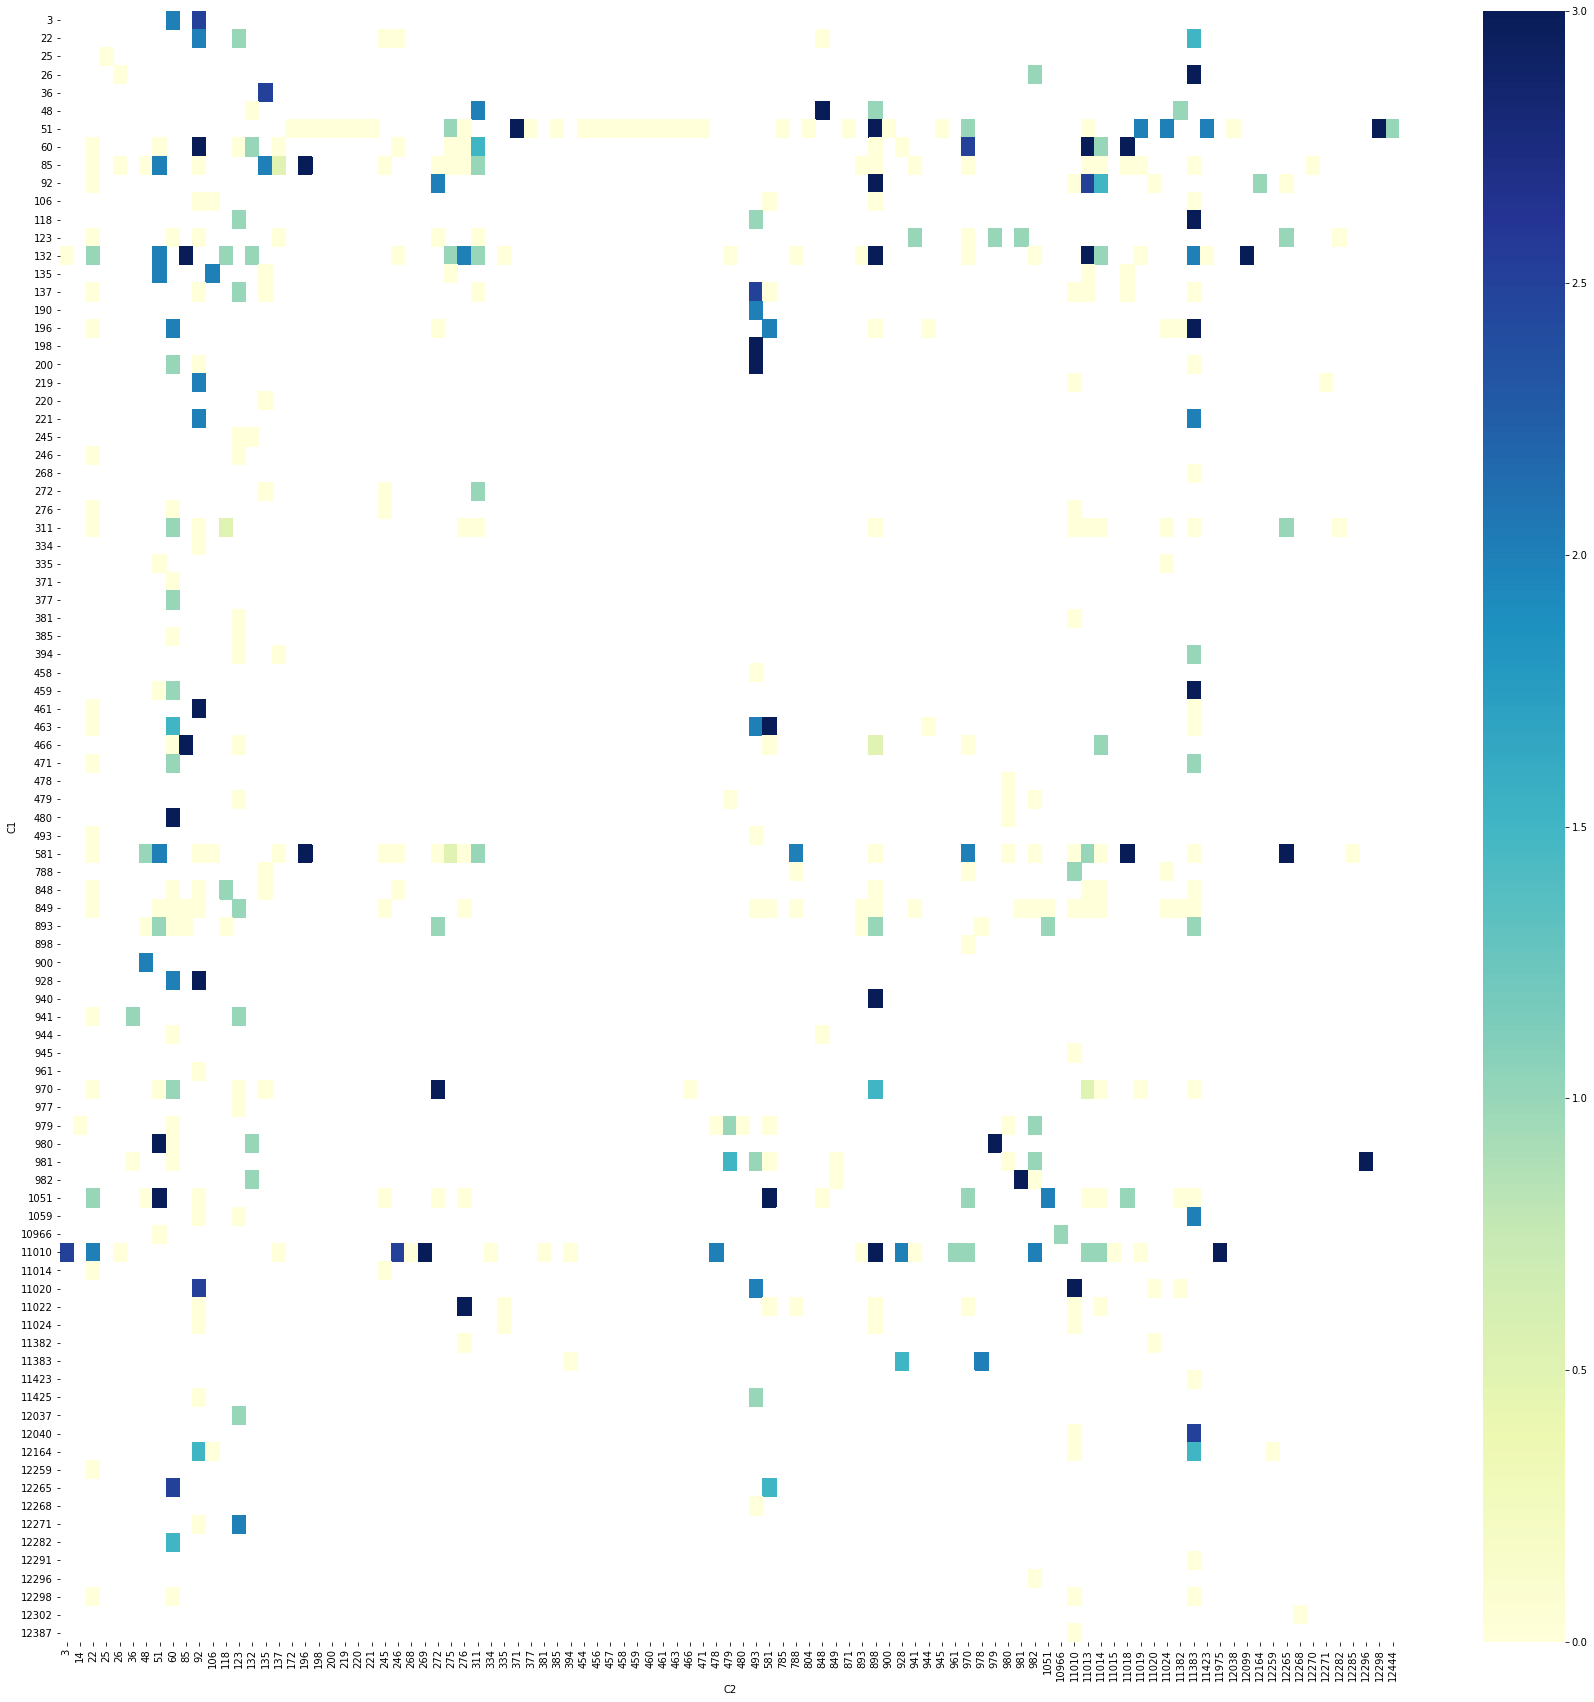

In [55]:
plt.figure(figsize=(30,30))
filtro = df_dados['mediana'] <= 3
sns.heatmap(df_dados[filtro].pivot('C1','C2','mediana'), cmap="YlGnBu")